In [1]:
import requests
import zipfile
import os

# URL of the dataset
url = 'https://www.dropbox.com/scl/fi/u2w4eoeiksyae1pn0di6d/IndianSignLanguage.zip?rlkey=38ztp9zkqvhdvusoeet3a9qex&dl=1'  # Set dl=1 to download directly

# Download the file
response = requests.get(url)
zip_path = 'IndianSignLanguage.zip'

# Save the ZIP file
with open(zip_path, 'wb') as f:
    f.write(response.content)

print("Dataset downloaded successfully.")

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('IndianSignLanguage')

print("Dataset extracted successfully.")


Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        O       1200
1        I       1200
2        5       1200
3        P       1200
4        R       1200
5        A       1200
6        C       1200
7        Z       1200
8        K       1200
9        3       1200
10       W       1200
11       M       1200
12       G       1200
13       U       1200
14       Y       1200
15       4       1200
16       S       1200
17       Q       1200
18       D       1200
19       1       1200
20       B       1200
21       T       1200
22       6       1200
23       H       1200
24       F       1200
25       E       1200
26       7       1200
27       9       1200
28       X       1200
29       N       1200
30       V       1200
31       2       1200
32       J       1200
33       8       1200
34       L       1200



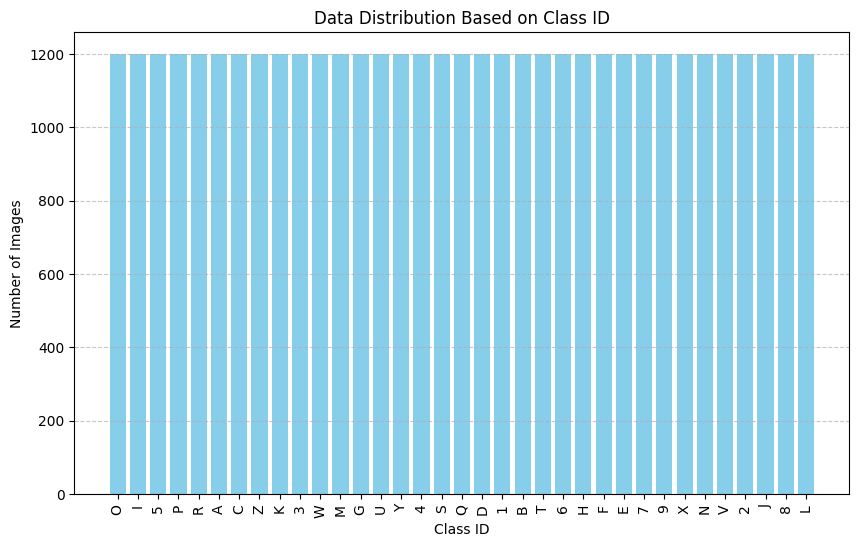

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "IndianSignLanguage/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 42000
Number of classes: 35
Class distribution:
   ClassID  NumImages
0        O       1200
1        I       1200
2        5       1200
3        P       1200
4        R       1200
5        A       1200
6        C       1200
7        Z       1200
8        K       1200
9        3       1200
10       W       1200
11       M       1200
12       G       1200
13       U       1200
14       Y       1200
15       4       1200
16       S       1200
17       Q       1200
18       D       1200
19       1       1200
20       B       1200
21       T       1200
22       6       1200
23       H       1200
24       F       1200
25       E       1200
26       7       1200
27       9       1200
28       X       1200
29       N       1200
30       V       1200
31       2       1200
32       J       1200
33       8       1200
34       L       1200



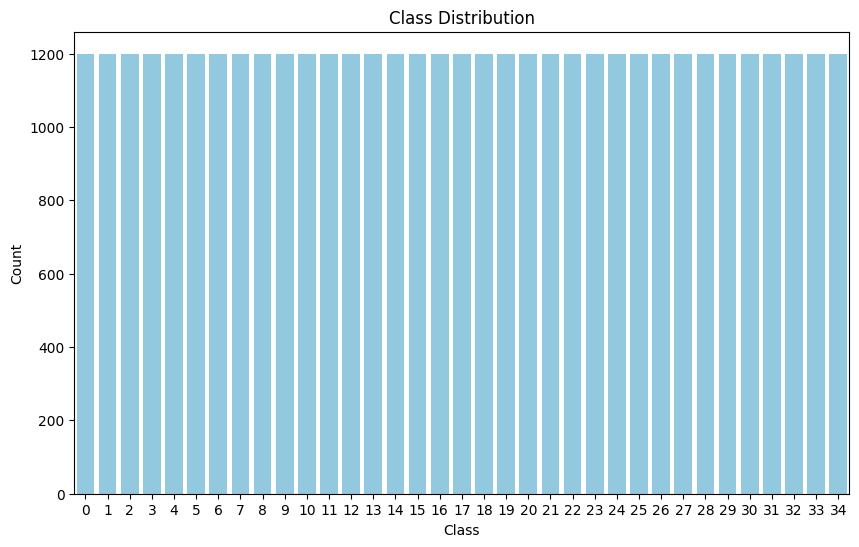

In [3]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "IndianSignLanguage/data"
target_dir = "IndianSignLanguage_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


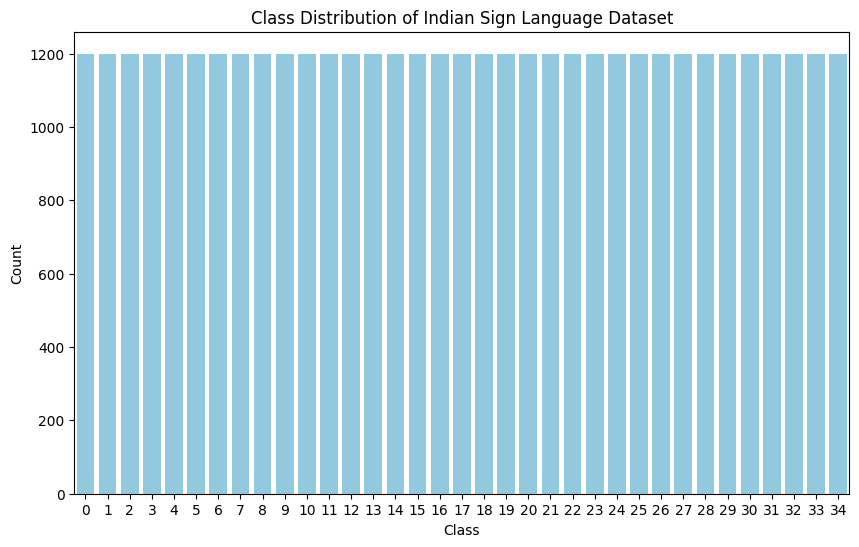

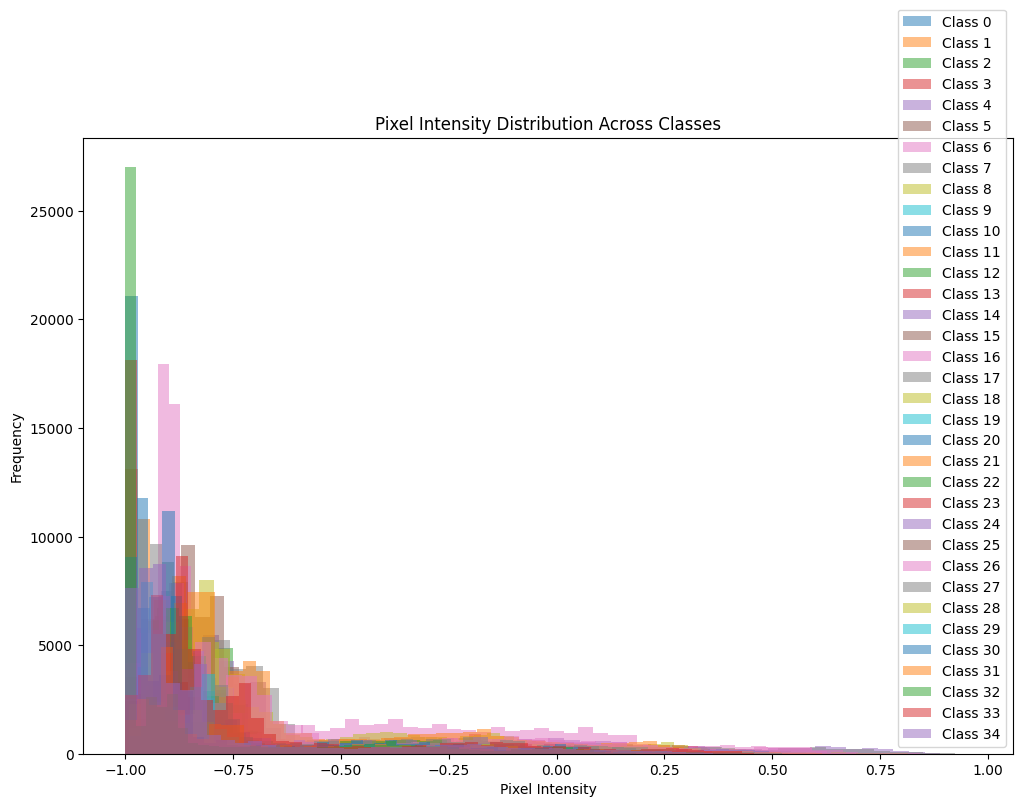

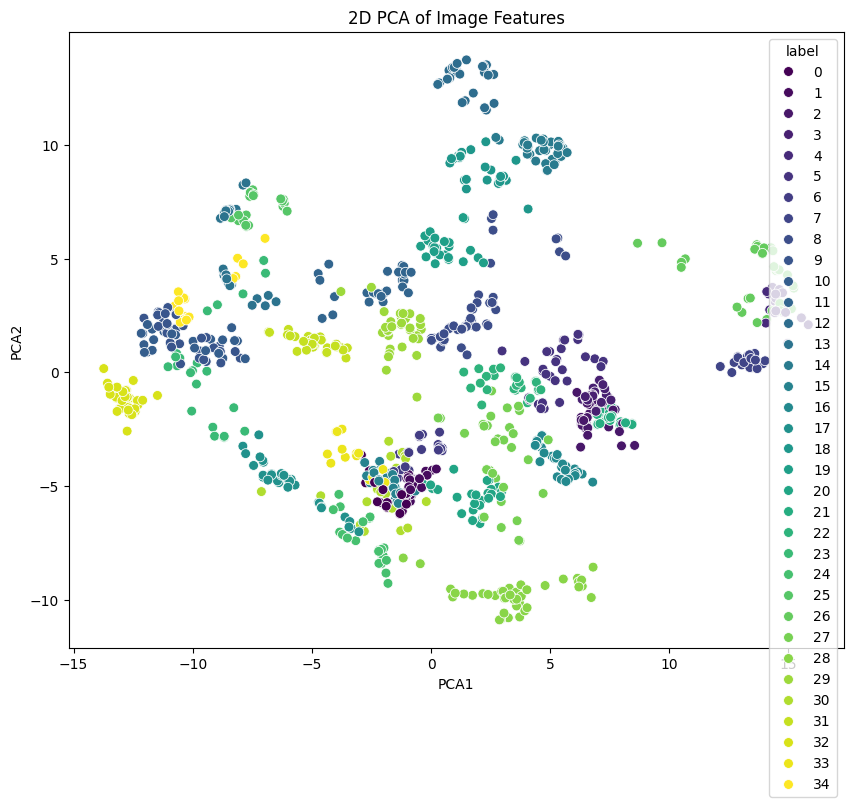

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
from sklearn.decomposition import PCA

# Define paths
data_dir = 'IndianSignLanguage_processed'  # Path to the processed image dataset

# Load dataset with transformation for feature extraction
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 32x32
    transforms.ToTensor(),        # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load the dataset
dataset = datasets.ImageFolder(root=data_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Convert dataset into DataFrame (image path and labels)
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution of Indian Sign Language Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Function to plot pixel intensity distribution for images in each class
def plot_pixel_intensity_distribution(data_loader, n_classes=35, n_samples=500):
    pixel_values = {i: [] for i in range(n_classes)}  # Dictionary to store pixel values per class

    # Loop through the data loader and collect pixel intensities
    for i, (images, labels) in enumerate(data_loader):
        if i * 64 >= n_samples:  # Limit number of samples to avoid memory overload
            break
        for j in range(images.size(0)):  # Loop through each image in the batch
            pixel_values[labels[j].item()].append(images[j].numpy().flatten())  # Flatten the image

    # Plot the distribution of pixel intensities for each class
    plt.figure(figsize=(12, 8))
    for class_id in range(n_classes):
        pixels = np.concatenate(pixel_values[class_id], axis=0)
        plt.hist(pixels, bins=50, alpha=0.5, label=f'Class {class_id}')

    plt.title('Pixel Intensity Distribution Across Classes')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the function to plot pixel intensities
plot_pixel_intensity_distribution(data_loader)

# Function to plot 2D PCA visualization of image features
def plot_pca_features(data_loader, n_components=2, n_samples=1000):
    features = []
    labels = []

    # Collect features (flattened images) and labels
    for i, (images, lbls) in enumerate(data_loader):
        if i * 64 >= n_samples:
            break
        features.append(images.view(images.size(0), -1).numpy())
        labels.append(lbls.numpy())

    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)

    # Create a DataFrame for visualization
    pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
    pca_df['label'] = labels

    # Plot the 2D PCA result
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='label', palette='viridis', s=50, legend='full')
    plt.title('2D PCA of Image Features')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

# Call the function to plot PCA features
plot_pca_features(data_loader)


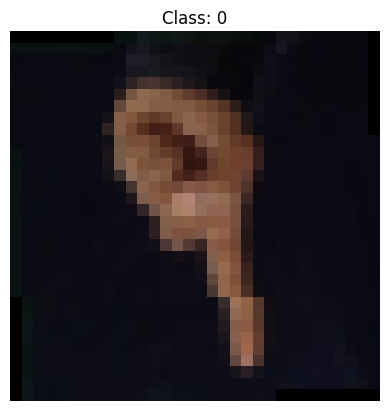

In [5]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(10),  # Random rotation within ±10 degrees
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset (make sure to replace 'data_dir' with your actual dataset path)
data_dir = 'IndianSignLanguage_processed'  # Replace with your dataset path
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Select a random image from the dataset
img, label = dataset[2]  # Get the first image and its label

# Convert tensor to numpy for visualization
img = img.numpy().transpose((1, 2, 0))  # Convert to HWC format
img = img * 0.5 + 0.5  # Undo the normalization (mean=0.5, std=0.5)

# Plot the image
plt.imshow(img)
plt.title(f'Class: {label}')
plt.axis('off')  # Hide axis
plt.show()


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# Set the random seed
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [8]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    # return all_labels, all_preds
    # Calculate evaluation metrics
    # fpr, tpr, _ = roc_curve(all_labels, all_preds)
    # roc_auc = auc(fpr, tpr)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, f1, recall, precision



In [9]:
# Lists to store training loss and metrics
training_loss_arr = [[] for _ in range(3)]  # Store loss for each dataset
accuracy_arr = [[] for _ in range(3)]  # Store accuracy for each dataset
f1_arr = [[] for _ in range(3)]  # Store F1 score for each dataset
recall_arr = [[] for _ in range(3)]  # Store recall for each dataset
precision_arr = [[] for _ in range(3)]  # Store precision for each dataset
# roc = [[] for _ in range(3)]  # Store roc for each dataset
epocs =10
train_loaders_arr = [0, 1, 2]

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [11]:


# Initialize the model
net = LeNet5(num_classes=35)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            # print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    # evaluate_model(net, test_loader)
        # Evaluate the model
    # print("Evaluation on Test Data:")
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader)  # Assuming test_loader is defined

    # Save metrics
    accuracy_arr[0].append(acc)
    f1_arr[0].append(f1_val)
    recall_arr[0].append(recall_val)
    precision_arr[0].append(precision_val)
    # roc[0].append(roc_acc)

# Print the metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)
# print("roc:", roc)

print("Finished Training")

Epoch 1, Loss: 0.025
Epoch 2, Loss: 0.004
Epoch 3, Loss: 0.002
Epoch 4, Loss: 0.002
Epoch 5, Loss: 0.005
Epoch 6, Loss: 0.001
Epoch 7, Loss: 0.001
Epoch 8, Loss: 0.001
Epoch 9, Loss: 0.001
Epoch 10, Loss: 0.000
Accuracy: [[0.9836520911038806, 0.9913498928656456, 0.9942861677644631, 0.9979366716927228, 0.9886516943099753, 0.9983334655979684, 0.999365129751607, 0.9983334655979684, 0.9997619236568527, 0.9997619236568527], [], []]
F1 Score: [[0.9836373152201414, 0.9913237251069055, 0.9942748921252746, 0.997936042599223, 0.9886720343257193, 0.9983343156751762, 0.9993650353539799, 0.998331985272482, 0.9997619317783457, 0.999761923210089], [], []]
Recall: [[0.9836520911038806, 0.9913498928656456, 0.9942861677644631, 0.9979366716927228, 0.9886516943099753, 0.9983334655979684, 0.999365129751607, 0.9983334655979684, 0.9997619236568527, 0.9997619236568527], [], []]
Precision: [[0.9840196328241257, 0.9916262056755892, 0.9945741213683997, 0.9979475685223971, 0.9895908350756518, 0.9983964070216513, 

In [12]:
import requests
import zipfile
import os

# URL of the dataset with direct download
url = 'https://www.dropbox.com/scl/fi/7o8eil59unj7vsxws6zgo/Sign-Language-Digits-Dataset-master-1.zip?rlkey=l3hrprqn03ts03ulbth2216w0&st=c1k4gdpw&dl=1'

# Download the file
response = requests.get(url)

# Check if the response is successful
if response.status_code == 200:
    zip_path = 'Sign-Language-Digits-Dataset-master.zip'

    # Save the ZIP file
    with open(zip_path, 'wb') as f:
        f.write(response.content)

    print("Dataset downloaded successfully.")

    # Verify if the file is a valid zip file
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.testzip()  # Test the zip file integrity
            zip_ref.extractall('Sign-Language-Digits-Dataset-master')
            print("Dataset extracted successfully.")
    except zipfile.BadZipFile:
        print("Error: The file is not a valid zip file.")
else:
    print(f"Error downloading the dataset. Status code: {response.status_code}")


Dataset downloaded successfully.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 2062
Number of classes: 10
Class distribution:
  ClassID  NumImages
0       5        207
1       3        206
2       4        207
3       1        206
4       6        207
5       7        206
6       9        204
7       0        205
8       2        206
9       8        208



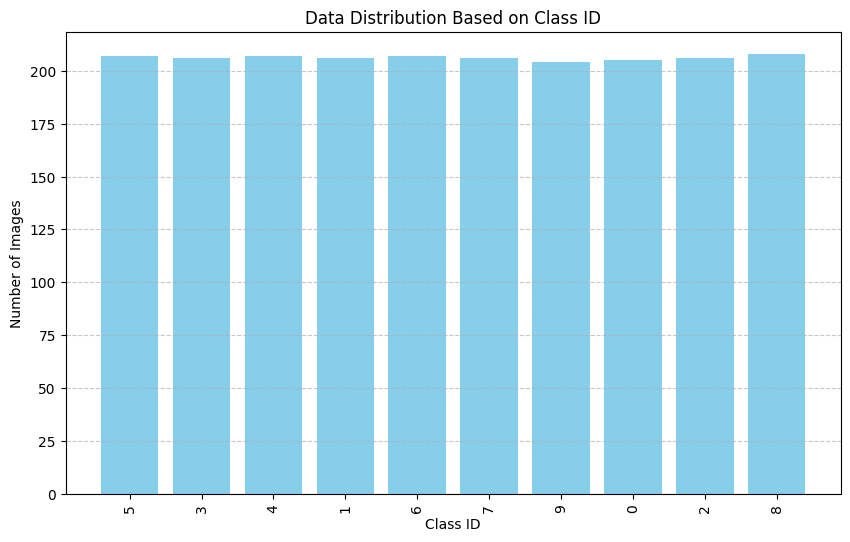

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "Sign-Language-Digits-Dataset-master/Sign-Language-Digits-Dataset-master/Dataset"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 2062
Number of classes: 10
Class distribution:
  ClassID  NumImages
0       5        207
1       3        206
2       4        207
3       1        206
4       6        207
5       7        206
6       9        204
7       0        205
8       2        206
9       8        208



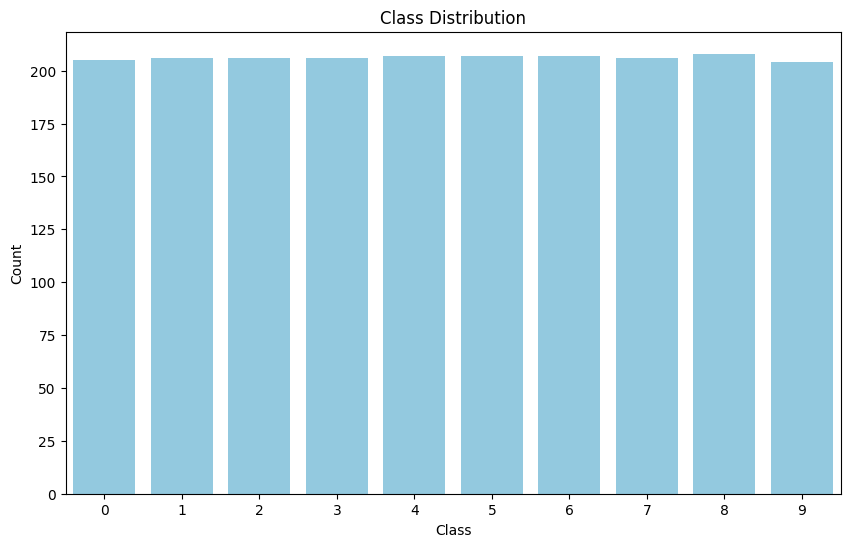

In [14]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "Sign-Language-Digits-Dataset-master/Sign-Language-Digits-Dataset-master/Dataset"
target_dir = "Sign-Language-Digits-Dataset-master_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    # transforms.RandomHorizontalFlip(),  # Random horizontal flip
    # transforms.RandomVerticalFlip(),
    # transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [16]:
# Set the random seed
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [17]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    # return all_labels, all_preds
    # Calculate evaluation metrics
    # fpr, tpr, _ = roc_curve(all_labels, all_preds)
    # roc_auc = auc(fpr, tpr)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, f1, recall, precision

# Lists to store training loss and metrics
# training_loss_arr = [[] for _ in range(3)]  # Store loss for each dataset
# accuracy_arr = [[] for _ in range(3)]  # Store accuracy for each dataset
# f1_arr = [[] for _ in range(3)]  # Store F1 score for each dataset
# recall_arr = [[] for _ in range(3)]  # Store recall for each dataset
# precision_arr = [[] for _ in range(3)]  # Store precision for each dataset
# # roc = [[] for _ in range(3)]  # Store roc for each dataset
# epocs =10
# train_loaders_arr = [0, 1, 2]

In [18]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [19]:


# Initialize the model
net = LeNet5(num_classes=10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            # print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    # evaluate_model(net, test_loader)
        # Evaluate the model
    # print("Evaluation on Test Data:")
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader)  # Assuming test_loader is defined

    # Save metrics
    accuracy_arr[1].append(acc)
    f1_arr[1].append(f1_val)
    recall_arr[1].append(recall_val)
    precision_arr[1].append(precision_val)
    # roc[0].append(roc_acc)

# Print the metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)
# print("roc:", roc)

print("Finished Training")

Epoch 1, Loss: 2.276
Epoch 2, Loss: 1.848
Epoch 3, Loss: 1.191
Epoch 4, Loss: 0.862
Epoch 5, Loss: 0.646
Epoch 6, Loss: 0.566
Epoch 7, Loss: 0.469
Epoch 8, Loss: 0.431
Epoch 9, Loss: 0.367
Epoch 10, Loss: 0.318
Accuracy: [[0.9836520911038806, 0.9913498928656456, 0.9942861677644631, 0.9979366716927228, 0.9886516943099753, 0.9983334655979684, 0.999365129751607, 0.9983334655979684, 0.9997619236568527, 0.9997619236568527], [0.284329563812601, 0.46526655896607433, 0.6558966074313409, 0.777059773828756, 0.789983844911147, 0.8352180936995154, 0.8255250403877221, 0.8675282714054927, 0.8691437802907916, 0.8901453957996769], []]
F1 Score: [[0.9836373152201414, 0.9913237251069055, 0.9942748921252746, 0.997936042599223, 0.9886720343257193, 0.9983343156751762, 0.9993650353539799, 0.998331985272482, 0.9997619317783457, 0.999761923210089], [0.17773133991425888, 0.4404297535546268, 0.6380595411737867, 0.7738185179659751, 0.7870371979785218, 0.834306855072626, 0.8194441178472477, 0.8685690622090901, 0.

In [20]:
import requests
import zipfile
import os

# URL of the dataset with direct download
url = 'https://www.dropbox.com/scl/fi/n7ydj4yvfbasbztdii981/HandGesture.zip?rlkey=6go8qgavxyu457459tqcqjg87&st=m6qw81ee&dl=1'

# Download the file
response = requests.get(url)

# Check if the response is successful
if response.status_code == 200:
    zip_path = 'HandGesture.zip'

    # Save the ZIP file
    with open(zip_path, 'wb') as f:
        f.write(response.content)

    print("Dataset downloaded successfully.")

    # Check the first few bytes to verify it's a zip file
    if response.content[:4] == b'PK\x03\x04':  # The first bytes of a zip file
        print("Valid ZIP file detected.")

        # Verify if the file is a valid zip file
        try:
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.testzip()  # Test the zip file integrity
                zip_ref.extractall('HandGesture')
                print("Dataset extracted successfully.")
        except zipfile.BadZipFile:
            print("Error: The file is not a valid zip file.")
    else:
        print("Error: The file does not appear to be a valid ZIP file.")
else:
    print(f"Error downloading the dataset. Status code: {response.status_code}")


Dataset downloaded successfully.
Valid ZIP file detected.
Dataset extracted successfully.


Metadata Summary:
Total number of images: 3259
Number of classes: 2
Class distribution:
      ClassID  NumImages
0  thumbsdown       1641
1    thumbsup       1618



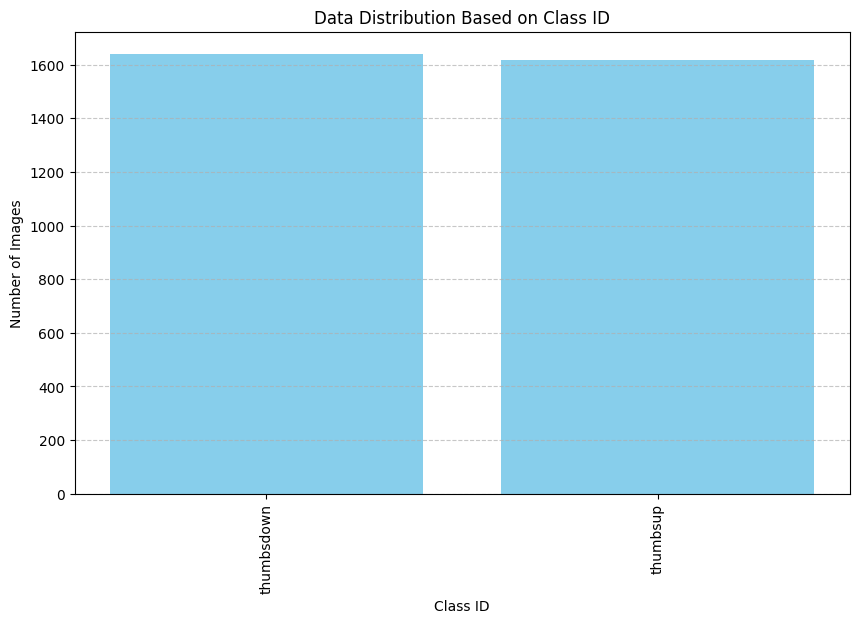

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Function to load the dataset and extract metadata
def extract_metadata(dataset_path):
    data = []
    class_distribution = {}

    # Loop through each class directory
    for class_dir in os.listdir(dataset_path):
        # Skip hidden files or directories (e.g., .DS_Store on macOS)
        if class_dir.startswith('.'):
            continue

        # Use the directory name as the class label (no conversion to int)
        class_id = class_dir
        class_images = os.listdir(os.path.join(dataset_path, class_dir))

        # Count the number of images in the class directory
        class_distribution[class_id] = len(class_images)
        data.append((class_id, len(class_images)))

    # Convert data to DataFrame for easier manipulation and visualization
    df = pd.DataFrame(data, columns=['ClassID', 'NumImages'])

    # Calculate total number of images
    total_images = df['NumImages'].sum()

    # Display metadata
    print("Metadata Summary:")
    print("=================")
    print("Total number of images:", total_images)
    print("Number of classes:", len(df))
    print("Class distribution:")
    print(df)
    print("")

    return df, class_distribution

# Path to the dataset
dataset_path = "HandGesture/data"

# Extract metadata
metadata_df, class_distribution = extract_metadata(dataset_path)

# Plot the data distribution based on class ID
plt.figure(figsize=(10, 6))
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Class ID')
plt.ylabel('Number of Images')
plt.title('Data Distribution Based on Class ID')
plt.xticks(rotation=90)  # Rotate x-axis labels if there are many classes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Exploratory Analysis:
Metadata Summary:
Total number of images: 3259
Number of classes: 2
Class distribution:
      ClassID  NumImages
0  thumbsdown       1641
1    thumbsup       1618



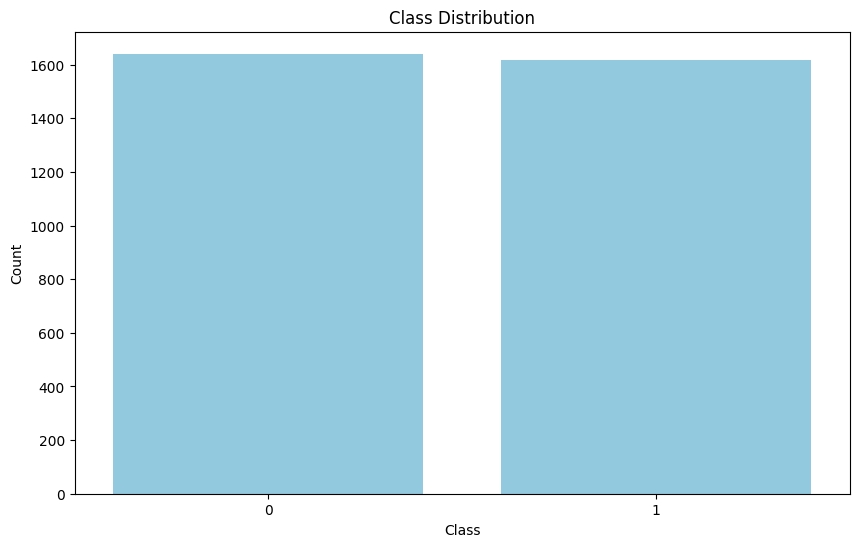

In [22]:
import os
import shutil
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms

# Define paths
source_dir = "HandGesture/data"
target_dir = "HandGesture_processed"

# Create target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Define classes to keep (adjust as needed for your dataset)
# Here, classes can be set as specific folder names you want to keep.
classes_to_keep = os.listdir(source_dir)  # Keeps all classes in the dataset

# Copy images of selected classes to the target directory
for class_name in classes_to_keep:
    src_path = os.path.join(source_dir, class_name)
    dst_path = os.path.join(target_dir, class_name)
    try:
        shutil.copytree(src_path, dst_path)
    except FileExistsError:
        print(f"Directory '{dst_path}' already exists. Skipping copying.")

# Dataset Paths
data_dir = target_dir

# Extract metadata
# Exploratory Analysis
print("Exploratory Analysis:")
metadata_df, class_distribution = extract_metadata(data_dir)

# Image transformations with data augmentation
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Load dataset with augmented transform
dataset = torchvision.datasets.ImageFolder(root=data_dir, transform=transform)

# Convert to DataFrame
df = pd.DataFrame(dataset.imgs, columns=['image_path', 'label'])

# Distribution Graphs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import os
import pandas as pd
import cv2
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# Set the random seed
# torch.manual_seed(42)
# Split dataset into train and test
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [25]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# from sklearn.metrics import roc_curve, auc

# Suppress the warning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.numpy())
            all_labels.extend(labels.numpy())
    # return all_labels, all_preds
    # Calculate evaluation metrics
    # fpr, tpr, _ = roc_curve(all_labels, all_preds)
    # roc_auc = auc(fpr, tpr)
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division='warn')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy, f1, recall, precision

In [26]:
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(16 * 5 * 5, 120),
            nn.ReLU(inplace=True),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [27]:


# Initialize the model
net = LeNet5(num_classes=2)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            # print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0
    # evaluate_model(net, test_loader)
        # Evaluate the model
    # print("Evaluation on Test Data:")
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.3f}")
    acc, f1_val, recall_val, precision_val = evaluate_model(net, test_loader)  # Assuming test_loader is defined

    # Save metrics
    accuracy_arr[2].append(acc)
    f1_arr[2].append(f1_val)
    recall_arr[2].append(recall_val)
    precision_arr[2].append(precision_val)
    # roc[0].append(roc_acc)

# Print the metrics
print("Accuracy:", accuracy_arr)
print("F1 Score:", f1_arr)
print("Recall:", recall_arr)
print("Precision:", precision_arr)
# print("roc:", roc)

print("Finished Training")

Epoch 1, Loss: 0.404
Epoch 2, Loss: 0.257
Epoch 3, Loss: 0.191
Epoch 4, Loss: 0.134
Epoch 5, Loss: 0.076
Epoch 6, Loss: 0.087
Epoch 7, Loss: 0.057
Epoch 8, Loss: 0.047
Epoch 9, Loss: 0.040
Epoch 10, Loss: 0.043
Accuracy: [[0.9836520911038806, 0.9913498928656456, 0.9942861677644631, 0.9979366716927228, 0.9886516943099753, 0.9983334655979684, 0.999365129751607, 0.9983334655979684, 0.9997619236568527, 0.9997619236568527], [0.284329563812601, 0.46526655896607433, 0.6558966074313409, 0.777059773828756, 0.789983844911147, 0.8352180936995154, 0.8255250403877221, 0.8675282714054927, 0.8691437802907916, 0.8901453957996769], [0.8568507157464212, 0.9130879345603272, 0.9284253578732107, 0.9560327198364008, 0.9703476482617587, 0.9754601226993865, 0.9785276073619632, 0.9805725971370143, 0.9887525562372188, 0.9754601226993865]]
F1 Score: [[0.9836373152201414, 0.9913237251069055, 0.9942748921252746, 0.997936042599223, 0.9886720343257193, 0.9983343156751762, 0.9993650353539799, 0.998331985272482, 0.999

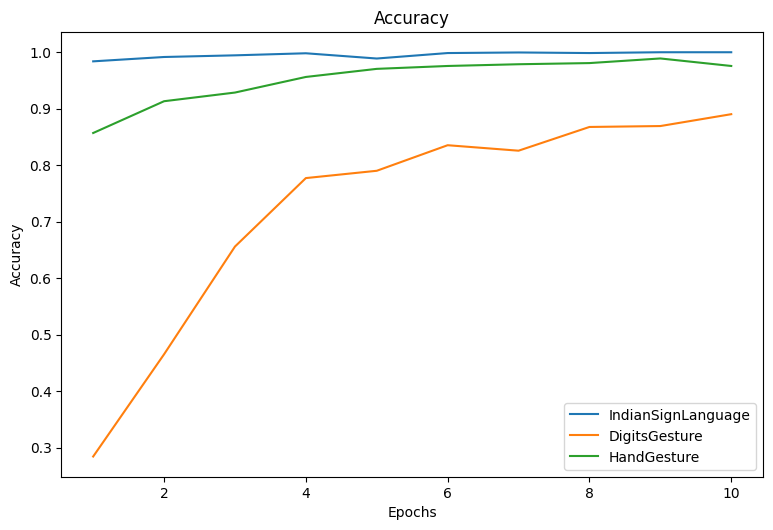

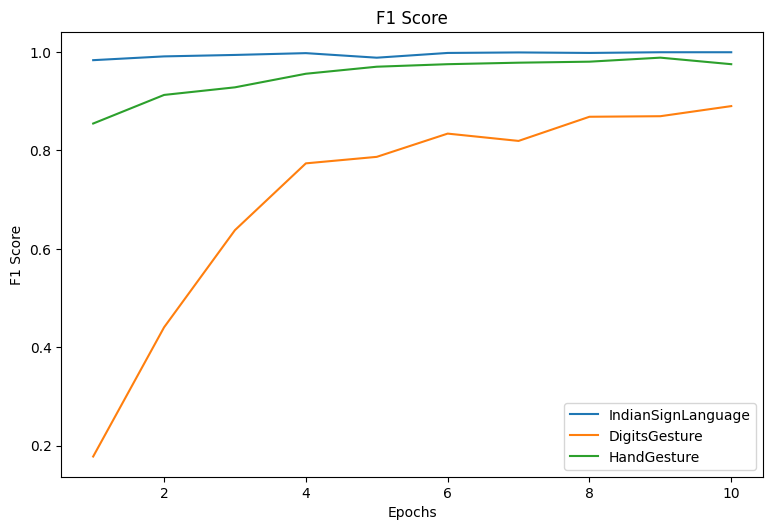

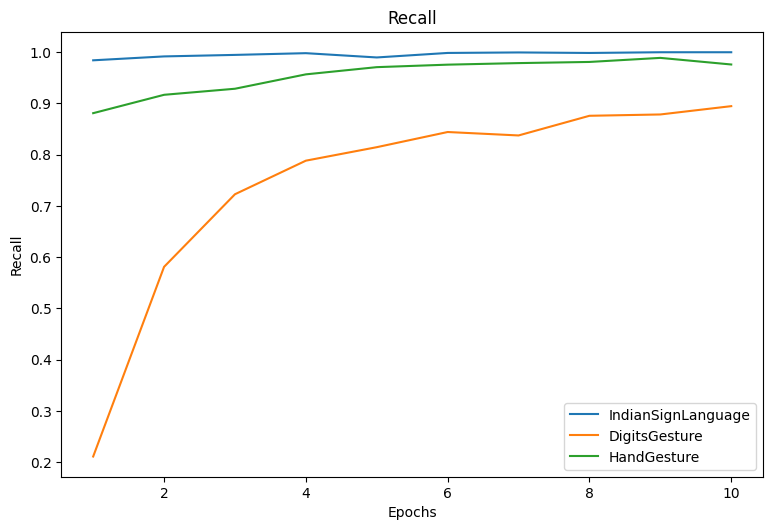

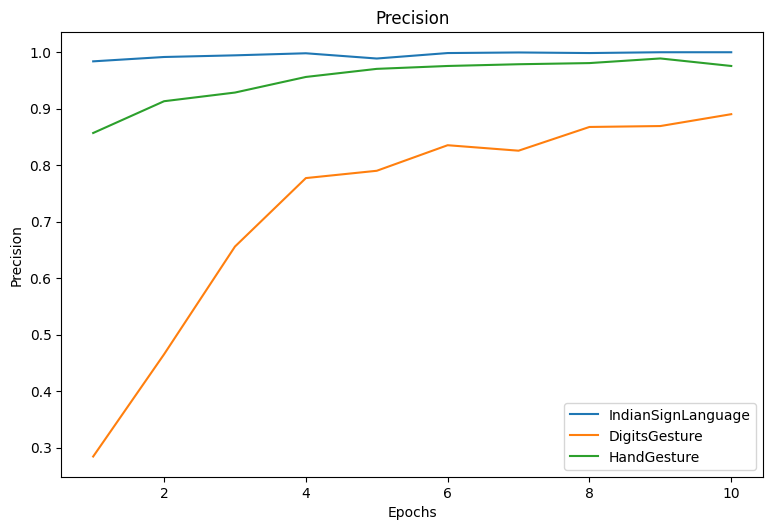

In [28]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 11)  # Assuming 10 epochs

# Define dataset names
datasets = ['IndianSignLanguage', 'DigitsGesture', 'HandGesture']
# Plotting
def my_plot(epochs, accuracy_arr, datasets, label):
  plt.figure(figsize=(15, 10))
  for i in range(3):
      plt.subplot(2, 2, 1)
      plt.plot(epochs, accuracy_arr[i], label=datasets[i])
      plt.title(label)
      plt.xlabel('Epochs')
      plt.ylabel(label)
      plt.legend()
  plt.tight_layout()
  plt.show()

my_plot(epochs, accuracy_arr, datasets, 'Accuracy')
my_plot(epochs, f1_arr, datasets, 'F1 Score')
my_plot(epochs, precision_arr, datasets, 'Recall')
my_plot(epochs, recall_arr, datasets, 'Precision')

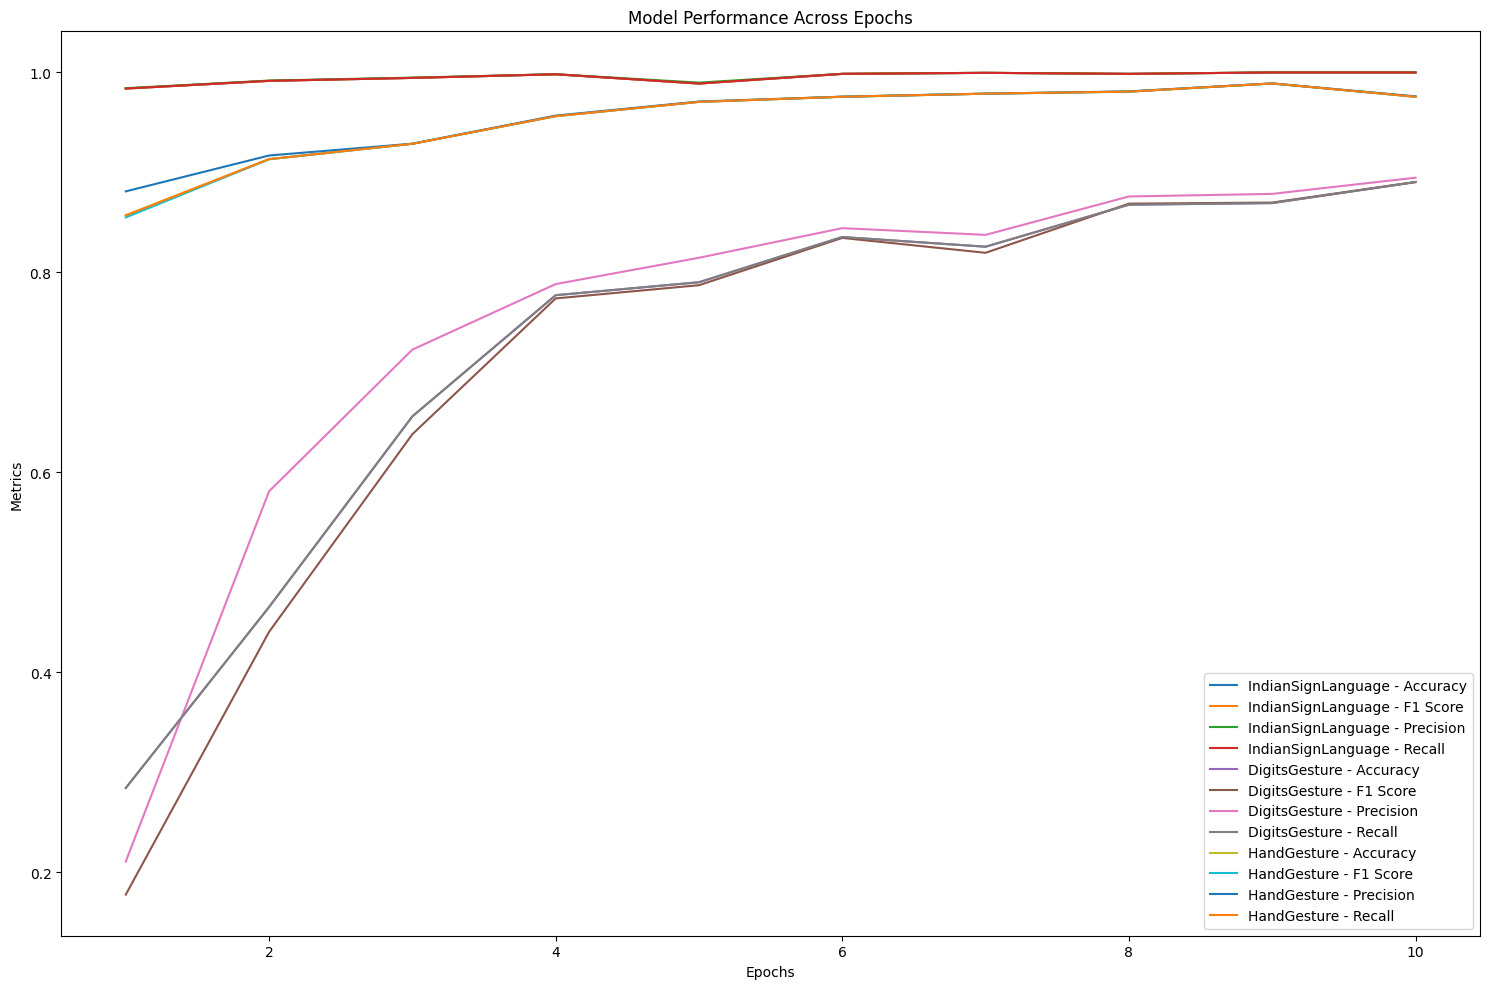

In [29]:
import matplotlib.pyplot as plt

# Define the number of epochs
epochs = range(1, 11)  # Assuming 10 epochs

# Define dataset names
datasets = ['IndianSignLanguage', 'DigitsGesture', 'HandGesture']

# Assuming you have these arrays already defined
# Example: accuracy_arr, f1_arr, precision_arr, recall_arr

# Plotting function to plot all metrics in one graph
def plot_metrics(epochs, accuracy_arr, f1_arr, precision_arr, recall_arr, datasets):
    plt.figure(figsize=(15, 10))

    # Plot each metric
    for i in range(3):
        plt.plot(epochs, accuracy_arr[i], label=f'{datasets[i]} - Accuracy')
        plt.plot(epochs, f1_arr[i], label=f'{datasets[i]} - F1 Score')
        plt.plot(epochs, precision_arr[i], label=f'{datasets[i]} - Precision')
        plt.plot(epochs, recall_arr[i], label=f'{datasets[i]} - Recall')

    # Adding labels and title
    plt.title('Model Performance Across Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Call the function with the data
plot_metrics(epochs, accuracy_arr, f1_arr, precision_arr, recall_arr, datasets)